# SMARTWATCH DATA ANALYSIS  USING PYTHON

## The Problem Statement


A high-tech manufacturer of health-focused products for women is a successful small company, but has the potential to become a larger player in the global smart device market.

**Need to analyze the smart device ﬁtness data and derive insights that would help unlock new growth opportunities for the company**

## Data source
The dataset used is **FitBit Fitness Tracker Data** (Public Dataset).This data set contains personal ﬁtness tracker from 30 ﬁtbit users.It includes information about daily activity, steps, heart rate, Calories burnt and weight that can be used to explore users’ habits.


## Step1: Importing Python libraries and Data:

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Import path to data
path = r"C:\Users\Admin\Downloads\archive\Fitabase Data 4.12.16-5.12.16"

# Dailydata
daily_activity = pd.read_csv(os.path.join(path, 'dailyActivity_merged.csv')) 
daily_sleep = pd.read_csv(os.path.join(path, 'sleepDay_merged.csv'))

# Hourlydata
hourly_calories = pd.read_csv(os.path.join(path, 'hourlyCalories_merged.csv'))
hourly_intensities = pd.read_csv(os.path.join(path, 'hourlyIntensities_merged.csv'))
hourly_steps = pd.read_csv(os.path.join(path, 'hourlySteps_merged.csv'))

# The other datasets contains has only 8 users data, which is very small

## Step2: Data Cleaning and Transformation

## Information about the data


In [9]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

* Need to convert date column to standard datetime datatype

### Standardizing DateTime Format

In [12]:
# daily data
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'],format="%d/%m/%Y")
daily_sleep['SleepDay'] = pd.to_datetime(daily_sleep['SleepDay'],format="%d/%m/%Y")


# hourly data
hourly_calories['ActivityHour'] = pd.to_datetime(hourly_calories['ActivityHour'])
hourly_intensities['ActivityHour'] = pd.to_datetime(hourly_intensities['ActivityHour'])
hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'])

In [14]:
daily_activity.info(),daily_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

(None, None)

- Only ActivityDate column is Object datatype, Coverting this to datetime datatype which can be used in analysis

## Merging data to single dataframe

In [15]:
# Merge daily_data
daily_df = pd.merge(daily_activity,daily_sleep,how="left",left_on=["Id","ActivityDate"],right_on=["Id","SleepDay"])


# Merge hourly data

hourly_df = pd.merge(hourly_calories, hourly_intensities, how='outer', on=['Id', 'ActivityHour'])
hourly_df = pd.merge(hourly_df, hourly_steps, how='outer', on=['Id', 'ActivityHour'])

## Removing Duplicates

In [17]:
daily_df = daily_df.drop_duplicates(keep='first')
hourly_df = hourly_df.drop_duplicates(keep='first')


In [29]:
# Remove rows that have TotalDistance = 0, assuming that FitBit was not wore on that day
daily_df = daily_df.drop(daily_df[(daily_df['TotalDistance'] == 0)].index)

## Checking for  null values

In [30]:
daily_df.isna().sum(),hourly_df.isna().sum()

(Id                            0
 ActivityDate                  0
 TotalSteps                    0
 TotalDistance                 0
 TrackerDistance               0
 LoggedActivitiesDistance      0
 VeryActiveDistance            0
 ModeratelyActiveDistance      0
 LightActiveDistance           0
 SedentaryActiveDistance       0
 VeryActiveMinutes             0
 FairlyActiveMinutes           0
 LightlyActiveMinutes          0
 SedentaryMinutes              0
 Calories                      0
 SleepDay                    452
 TotalSleepRecords           452
 TotalMinutesAsleep          452
 TotalTimeInBed              452
 dtype: int64,
 Id                  0
 ActivityHour        0
 Calories            0
 TotalIntensity      0
 AverageIntensity    0
 StepTotal           0
 dtype: int64)

* 452 null values because of merging dataframes

## Data Summary Statistics

In [33]:
daily_df.describe()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,8.620000e+02,862,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,410,410.000000,410.000000,410.000000
mean,4.861037e+09,2016-04-26 02:15:18.793503488,8329.039443,5.986450,5.970800,0.117959,1.638654,0.618898,3.643121,0.001752,23.041763,14.792343,210.258701,955.192575,2362.470998,2016-04-26 11:38:55.609756160,1.119512,419.173171,458.482927
min,1.503960e+09,2016-04-12 00:00:00,8.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,2016-04-12 00:00:00,1.000000,58.000000,61.000000
25%,2.320127e+09,2016-04-18 00:00:00,4926.750000,3.372500,3.372500,0.000000,0.000000,0.000000,2.350000,0.000000,0.000000,0.000000,147.000000,721.250000,1856.750000,2016-04-19 00:00:00,1.000000,361.000000,403.750000
50%,4.445115e+09,2016-04-26 00:00:00,8053.500000,5.590000,5.590000,0.000000,0.410000,0.310000,3.580000,0.000000,7.000000,8.000000,208.500000,1020.500000,2220.500000,2016-04-27 00:00:00,1.000000,432.500000,463.000000
75%,6.962181e+09,2016-05-03 00:00:00,11096.250000,7.905000,7.880000,0.000000,2.277500,0.867500,4.897500,0.000000,35.000000,21.000000,272.000000,1189.000000,2832.000000,2016-05-04 00:00:00,1.000000,490.000000,526.000000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,2016-05-12 00:00:00,3.000000,796.000000,961.000000
std,2.417627e+09,NaN,4739.246947,3.717616,3.699756,0.646473,2.736308,0.905329,1.854434,0.007655,33.656502,20.433053,96.574833,279.971556,702.269583,NaN,0.346636,118.635918,127.455140


**Insights**
* Average daily steps is 8329, which is lower than the recommended 10,000 steps per day
* Average daily calories burned is 2362, which is between the recommended daily calories intake for men (2500) and women (2000)
* Average daily sendatary minutes is 955 minutes (16 hours), much longer than the average daily minutes asleep of 419 minutes (6.9 hours)
* Difference between average daily time in bed is longer than average daily time asleep by 39 minutes

<Axes: >

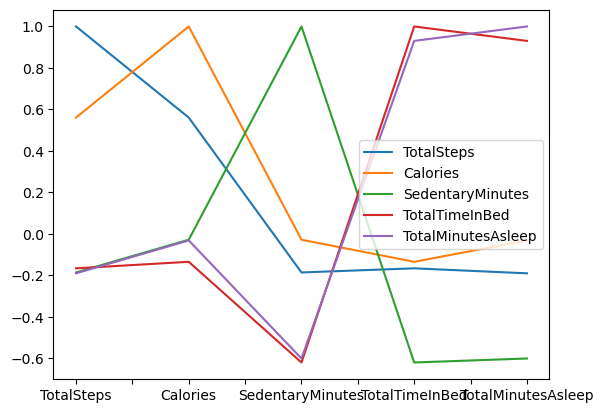

In [34]:
cormat = daily_df[['TotalSteps','Calories', 'SedentaryMinutes', 'TotalTimeInBed', 'TotalMinutesAsleep']].corr()
cormat.plot()

**Insights**
* Positive correlation between daily steps and calories burned
* Little to no correlation between calories burned and amount of sedentary time
* Negative correlation between amount of sedentary time and time asleep
* Strong positive correlation between time in bed and time asleep

### Daily Steps v Calories Burned

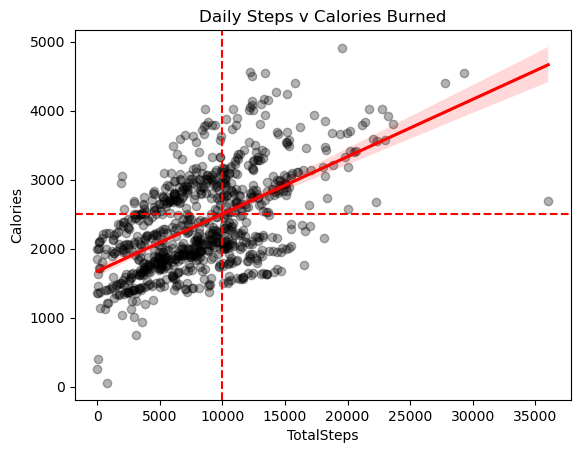

In [47]:
sns.regplot(x='TotalSteps', y='Calories', data=daily_df,scatter_kws = {"color": "black", "alpha": 0.3},
            line_kws = {"color": "red"})
plt.title('Daily Steps v Calories Burned')
plt.axvline(x=10000, color='red',ls="--")
plt.axhline(y=2500, color='red',ls="--")
plt.show()

**Insights**
* Generally, daily steps of users range between 0 to 20,000 steps
* The estimated amount of calories burnt will be around 2500 if daily steps taken is around 10,000
* Deduced that outliers could be due to natural variation of data, change in user's usage or errors in data collection (ie. miscalculations, data contamination or human error).

### Daily Sedentary Minutes v Time Asleep

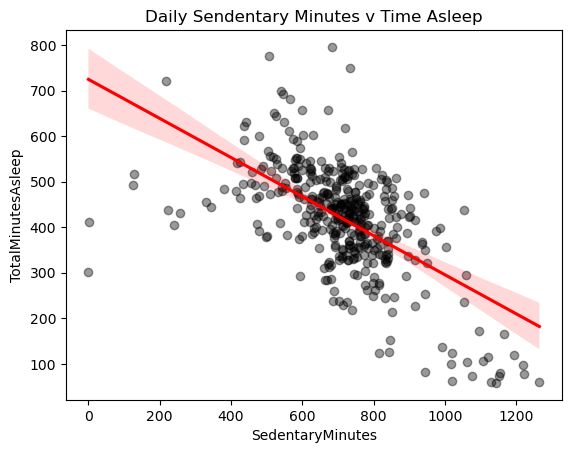

In [48]:
sns.regplot(x='SedentaryMinutes', y='TotalMinutesAsleep', data=daily_df,scatter_kws = {"color": "black", "alpha": 0.4},
            line_kws = {"color": "red"})
plt.title('Daily Sendentary Minutes v Time Asleep')
plt.show()

* More sedentary time during the day, less time will be spent asleep.

## Weekly analysis

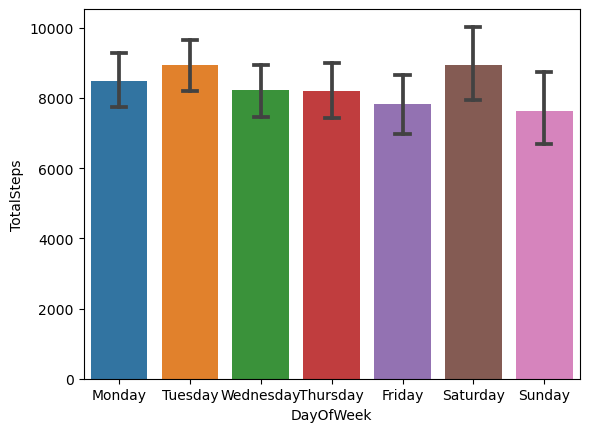

In [90]:
# Add DayOfWeek column
daily_df['DayOfWeek'] = daily_df['ActivityDate'].dt.day_name()

# Plot barchart DayOfWeek against TotalSteps 
sns.barplot(x="DayOfWeek", y="TotalSteps", data=daily_df,
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], capsize=.2)
plt.show()

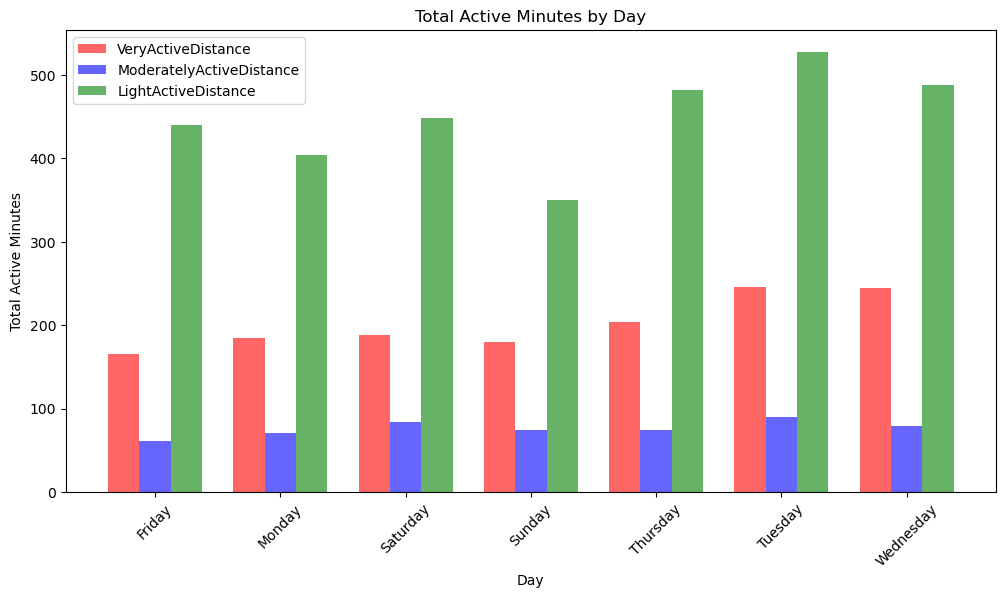

In [125]:

df=daily_df.copy()



grouped_df = df.groupby('DayOfWeek')[['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance']].sum().reset_index()

# Extract the data for each column
very_active = grouped_df['VeryActiveDistance']
fairly_active = grouped_df['ModeratelyActiveDistance']
lightly_active = grouped_df['LightActiveDistance']

# Get the unique days for the x-axis labels
days = grouped_df['DayOfWeek']


# Calculate the position of each bar on the x-axis
r1 = range(len(days))
r2 = [x + 0.25 for x in r1]
r3 = [x + 0.50 for x in r1]

# Plotting the bars
plt.figure(figsize=(12, 6))
plt.bar(r1, very_active, color='red', width=0.25, alpha=0.6, label='VeryActiveDistance')
plt.bar(r2, fairly_active, color='blue', width=0.25, alpha=0.6, label='ModeratelyActiveDistance')
plt.bar(r3, lightly_active, color='green', width=0.25, alpha=0.6, label='LightActiveDistance')

# Setting the x-axis ticks and labels
plt.xticks(r2, days, rotation=45)

# Labels and title
plt.xlabel('Day')
plt.ylabel('Total Active Minutes')
plt.title('Total Active Minutes by Day')

# Legend
plt.legend()

# Show the plot
plt.show()


* Users are most active on Saturdays and least active on Sundays

## Percentage of time spent in a day

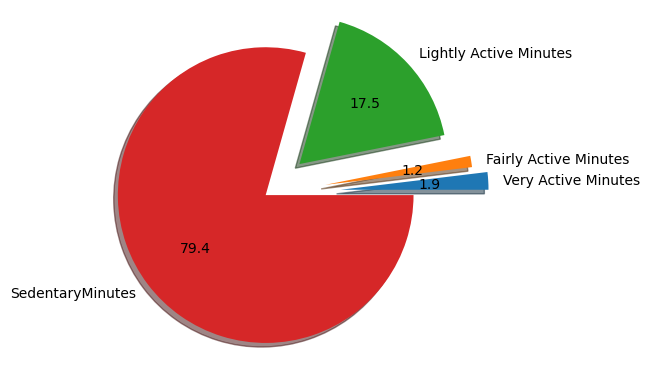

In [82]:
label =["Very Active Minutes", "Fairly Active Minutes", 
         "Lightly Active Minutes", "SedentaryMinutes"]

counts = daily_df[["VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes", "SedentaryMinutes"]].mean()
plt.pie(counts,labels=label,autopct="%1.1f",explode=(0.5,0.4,0.3,0.01),shadow=True)

plt.show()

**Insights1**
1. 79.4% of Total inactive minutes in a day
2. 17.5% of Lightly active minutes in a day
3. On an average, only 21 minutes (1.74%) were very active
1. and 1.11% (13 minutes) of fairly active minutes in a day

**This indicates that users are using the FitBit app to log daily activities such as daily commute, inactive movements (moving from one spot to another) or running errands.**

**App is rarely being used to track fitness (ie. running) as per the minor percentage of fairly active activity (1.2%) and very active activity (1.9%). This is highly discouraging as FitBit app was developed to encourage fitness.**

## Recommendations
This is a significant number and these are people unable to use their full potential, as activesness is found to be very low in these people. Through advertisement people can be educated about importance of right sleep hours thereby encouraging them to buy our products for their sleep tracking. People with 6-9 hours of sleep are the found to be most active.
* We can notify people with less sleep hours to atleast have 6 hours of sleep and encourage people with high sleep hours to reduce to 9-10 hours.
* High sedentary time is also found to have bad effect on sleep quality. Lower sedentary time is always better but people may have high sedentary time due to various important reasons too. So, **6-9 hours of sleep and 7-13 hours of sedentary time** is found to be best combination for high activeness. This can be our goal set in the watch to notify people if they go out of any matrix in the combination.

- To encourage engagement, there can be In-App daily challenges encouraging users to take either 10,000 steps or burn 2,500 calories in a day
    1. This is because most users have lower average daily steps than the recommended level
    2. As a motivator, users can be rewarded with discounts.